<a href="https://colab.research.google.com/github/nathandhawale/Song_Popularity/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
song_df = pd.read_csv('/content/song_data.csv')
song_df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
song_df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [6]:
song_df.min()

song_name           "40" - Live Version 1983
song_popularity                            0
song_duration_ms                       12000
acousticness                        0.000001
danceability                             0.0
energy                               0.00107
instrumentalness                         0.0
key                                        0
liveness                              0.0109
loudness                             -38.768
audio_mode                                 0
speechiness                              0.0
tempo                                    0.0
time_signature                             0
audio_valence                            0.0
dtype: object

In [7]:
song_df.max()

song_name            피 땀 눈물
song_popularity         100
song_duration_ms    1799346
acousticness          0.996
danceability          0.987
energy                0.999
instrumentalness      0.997
key                      11
liveness              0.986
loudness              1.585
audio_mode                1
speechiness           0.941
tempo               242.318
time_signature            5
audio_valence         0.984
dtype: object

In [8]:
#duplicated columns
song_df.duplicated().sum()

3909

In [9]:
#drop duplicated columns
song_df.drop_duplicates(inplace = True)
song_df.duplicated().sum()

0

In [10]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14926 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14926 non-null  object 
 1   song_popularity   14926 non-null  int64  
 2   song_duration_ms  14926 non-null  int64  
 3   acousticness      14926 non-null  float64
 4   danceability      14926 non-null  float64
 5   energy            14926 non-null  float64
 6   instrumentalness  14926 non-null  float64
 7   key               14926 non-null  int64  
 8   liveness          14926 non-null  float64
 9   loudness          14926 non-null  float64
 10  audio_mode        14926 non-null  int64  
 11  speechiness       14926 non-null  float64
 12  tempo             14926 non-null  float64
 13  time_signature    14926 non-null  int64  
 14  audio_valence     14926 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.8+ MB


In [11]:
song_df.isna().sum()
#no missing values

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

No categorical values

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Song Popularity Distribution')

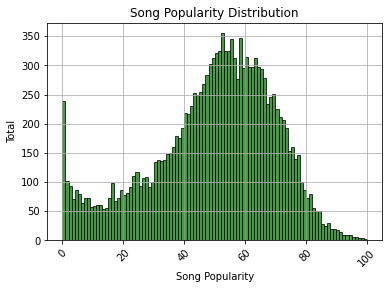

In [13]:
song_df['song_popularity'].hist(bins = 100, facecolor='g', alpha=0.75, edgecolor = 'black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Song Popularity')
plt.ylabel('Total')
plt.title('Song Popularity Distribution')

Text(0.5, 1.0, 'Song Length Distribution')

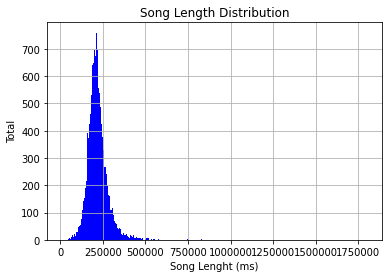

In [14]:
song_df['song_duration_ms'].hist(bins = 'auto', facecolor='blue')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Song Lenght (ms)')
plt.ylabel('Total')
plt.title('Song Length Distribution')

Text(0.5, 1.0, 'Acoustic Distribution')

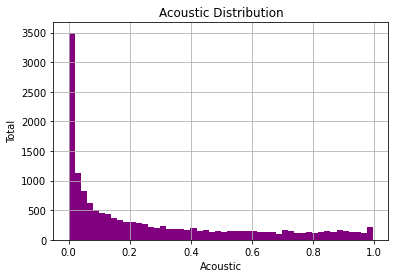

In [15]:
song_df['acousticness'].hist(bins = 50, facecolor='purple')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Acoustic')
plt.ylabel('Total')
plt.title('Acoustic Distribution')

Text(0.5, 1.0, 'Danceability Distribution')

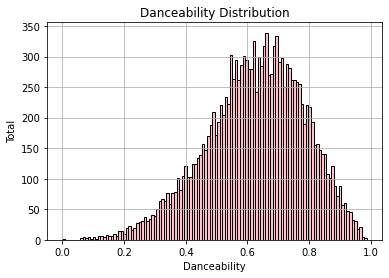

In [16]:
song_df['danceability'].hist(bins = 120 , facecolor='pink', edgecolor ='black')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Danceability')
plt.ylabel('Total')
plt.title('Danceability Distribution')

Text(0.5, 1.0, 'Energy Distribution')

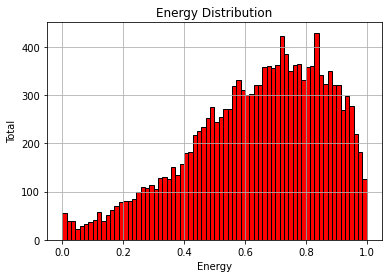

In [17]:
song_df['energy'].hist(bins = 70, facecolor='red', edgecolor = 'black')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Energy')
plt.ylabel('Total')
plt.title('Energy Distribution')

Text(0.5, 1.0, 'Density of Instrumentalness')

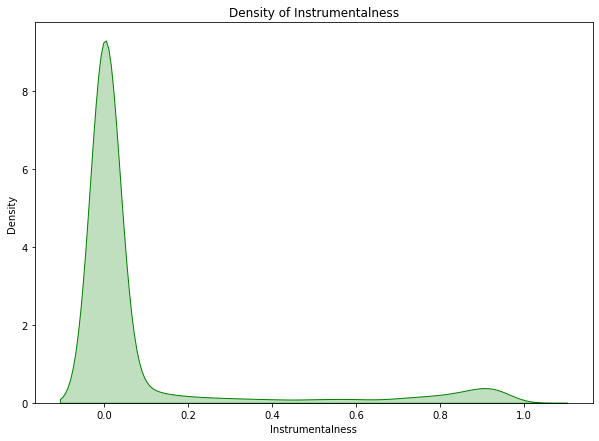

In [18]:
fig = plt.figure(figsize = (10,7))
sns.kdeplot(song_df['instrumentalness'],shade = True, color = 'g')
plt.xlabel('Instrumentalness')
plt.ylabel('Density')
plt.title('Density of Instrumentalness')

Text(0.5, 1.0, 'Density of Keys')

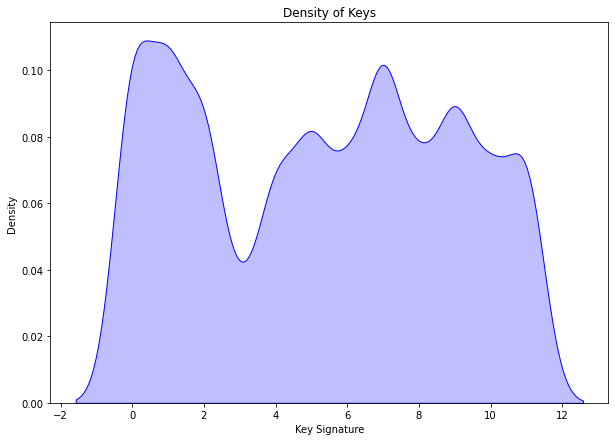

In [19]:
fig = plt.figure(figsize = (10,7))
sns.kdeplot(song_df['key'],shade = True, color = 'blue')
plt.xlabel('Key Signature')
plt.ylabel('Density')
plt.title('Density of Keys')

Text(0.5, 1.0, 'Density of Liveness')

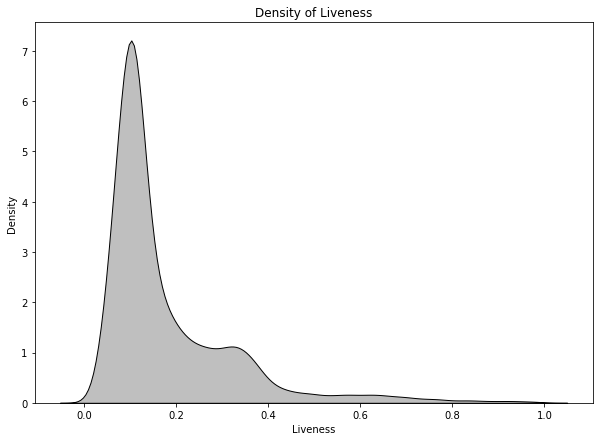

In [20]:
fig = plt.figure(figsize = (10,7))
sns.kdeplot(song_df['liveness'],shade = True, color = 'black')
plt.xlabel('Liveness')
plt.ylabel('Density')
plt.title('Density of Liveness')

Text(0.5, 1.0, 'Density of Loudness')

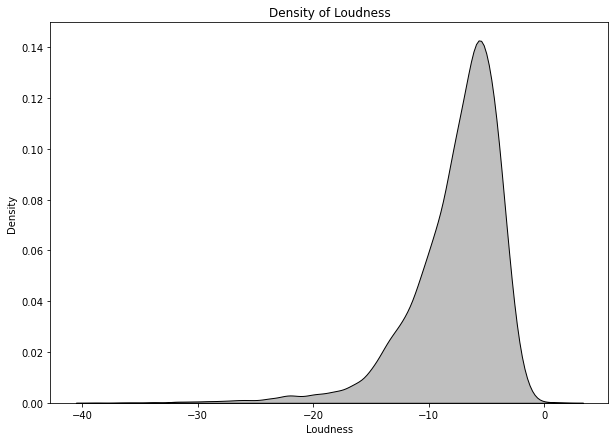

In [21]:
fig = plt.figure(figsize = (10,7))
sns.kdeplot(song_df['loudness'],shade = True, color = 'black')
plt.xlabel('Loudness')
plt.ylabel('Density')
plt.title('Density of Loudness')

Text(0.5, 1.0, 'Audio Mode')

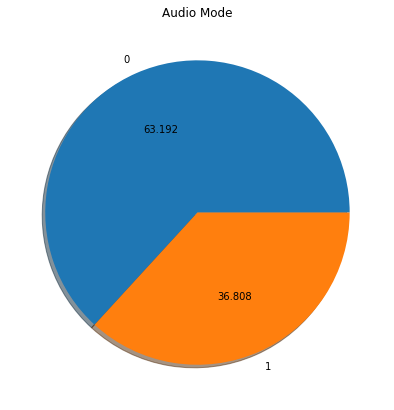

In [22]:
plt.figure(figsize = (7,7))
plt.pie(song_df['audio_mode'].value_counts(), autopct = '%.3f', labels = ['0','1'], shadow = True)
plt.title('Audio Mode')

Text(0.5, 1.0, 'Speechiness Distribution')

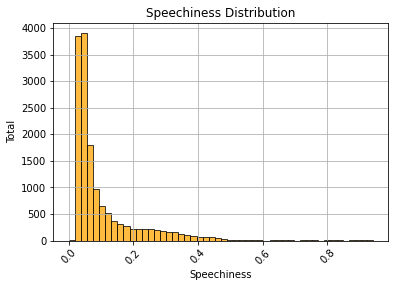

In [23]:
song_df['speechiness'].hist(bins = 50, facecolor='orange', alpha=0.75, edgecolor = 'black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Speechiness')
plt.ylabel('Total')
plt.title('Speechiness Distribution')

Text(0.5, 1.0, 'Tempo Distribution')

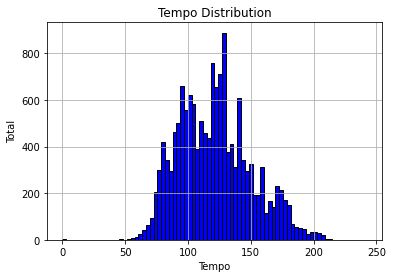

In [24]:
song_df['tempo'].hist(bins = 80, facecolor='blue', edgecolor = 'black')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Tempo')
plt.ylabel('Total')
plt.title('Tempo Distribution')

Text(0.5, 1.0, 'Time Signature')

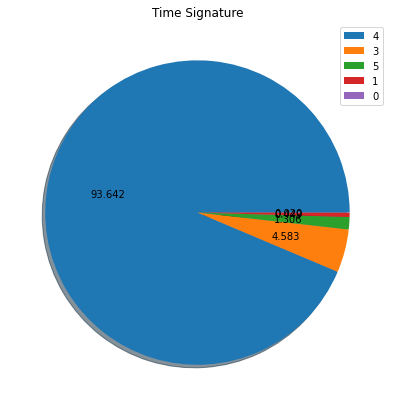

In [25]:
plt.figure(figsize = (7,7))
mylabels = ['4', '3', '5', '1', '0']

plt.pie(song_df['time_signature'].value_counts(),autopct = '%.3f', shadow = True)
plt.legend(mylabels)
plt.title('Time Signature')

Text(0.5, 1.0, 'Valence Distribution')

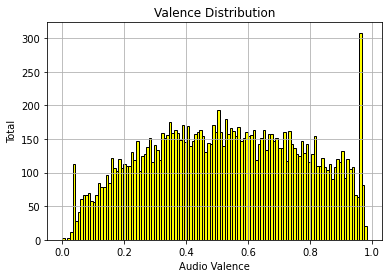

In [26]:
song_df['audio_valence'].hist(bins = 120 , facecolor='yellow', edgecolor = 'black')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Audio Valence')
plt.ylabel('Total')
plt.title('Valence Distribution')

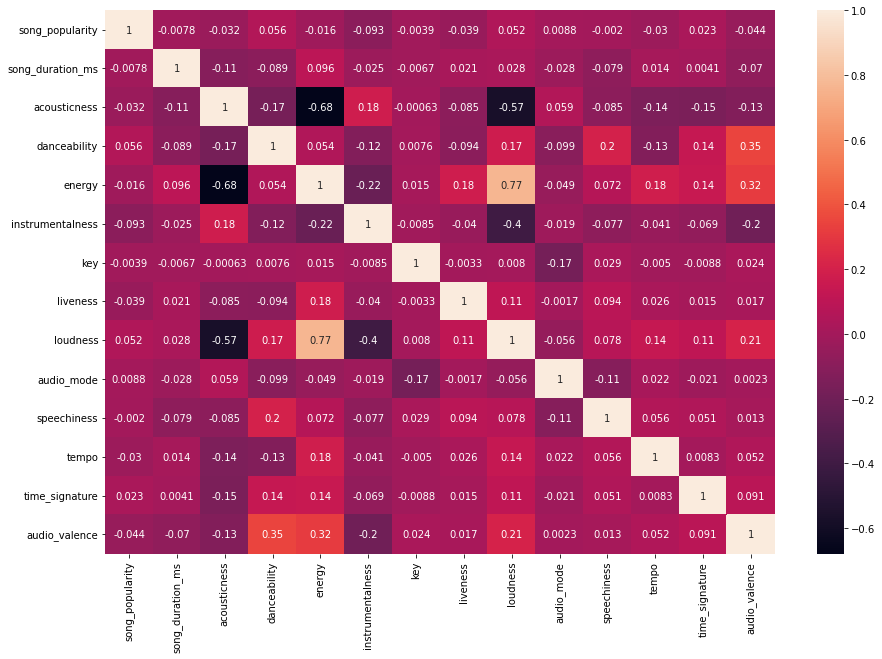

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(song_df.corr(), annot=True, ax=ax)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = song_df.drop(["song_name", "song_popularity"], axis=1)
y = song_df["song_popularity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [30]:
models = {
    '              Decision Tree' : DecisionTreeRegressor(),
    '              Random Forest' : RandomForestRegressor(),
    '           Linear Regression': LinearRegression(),
    '                 K-Neighbors': KNeighborsRegressor(),
    'Gradient Boosting Classifier': GradientBoostingRegressor(),
    '          Bagging Classifier': BaggingRegressor(),
    '         AdaBoost Classifier': AdaBoostRegressor()
    
}


for name, model in models.items():
    model = model.fit(X_train,y_train)
    print(name + " trained")

              Decision Tree trained
              Random Forest trained
           Linear Regression trained
                 K-Neighbors trained
Gradient Boosting Classifier trained
          Bagging Classifier trained
         AdaBoost Classifier trained


In [31]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print("Model:{}".format(name))
    print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))  
    print("R^2: {:.2f}".format(r2_score(y_test, y_pred)))  
    print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print(f'Train Accuracy {round(model.score(X_train, y_train)* 100,2)}%')
    print(f'Test Accuracy {round(model.score(X_test, y_test)* 100,2)}%')
    print('\n')  


Model:              Decision Tree
MSE: 772.26
R^2: -0.86
RMSE: 27.79
Train Accuracy 98.88%
Test Accuracy -86.06%


Model:              Random Forest
MSE: 406.73
R^2: 0.02
RMSE: 20.17
Train Accuracy 85.81%
Test Accuracy 2.01%


Model:           Linear Regression
MSE: 405.50
R^2: 0.02
RMSE: 20.14
Train Accuracy 2.33%
Test Accuracy 2.3%


Model:                 K-Neighbors
MSE: 503.08
R^2: -0.21
RMSE: 22.43
Train Accuracy 20.46%
Test Accuracy -21.21%


Model:Gradient Boosting Classifier
MSE: 393.86
R^2: 0.05
RMSE: 19.85
Train Accuracy 11.3%
Test Accuracy 5.11%


Model:          Bagging Classifier
MSE: 441.72
R^2: -0.06
RMSE: 21.02
Train Accuracy 80.59%
Test Accuracy -6.42%


Model:         AdaBoost Classifier
MSE: 407.03
R^2: 0.02
RMSE: 20.18
Train Accuracy 2.55%
Test Accuracy 1.93%




In [32]:
rf = RandomForestRegressor(random_state = 42)

In [33]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
rf.predict(X_test)

array([48.45, 51.48, 55.46, ..., 44.71, 48.32, 44.46])

In [35]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.8576450073944321
0.027502700054589546


In [37]:
rf_9 = RandomForestRegressor(max_depth = 9, random_state = 42)
rf_9.fit(X_train, y_train)
rf_9_train_score = rf_9.score(X_train, y_train)
rf_9_test_score = rf_9.score(X_test, y_test)
print(rf_9_train_score)
print(rf_9_test_score)

0.26391420635558904
0.0566023647860695


In [39]:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    rf = RandomForestRegressor(max_depth = depth, 
                             random_state = 42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    r2.append(score)

Text(0, 0.5, 'R2')

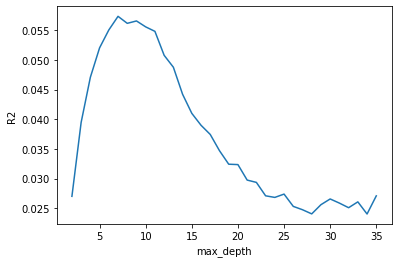

In [40]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2')